In [3]:
from functions import *

In [4]:
fi = np.genfromtxt('inds.txt')

In [5]:
slices = np.array([0, 200, 400, 600, 800, 1000, 1200, 1400, 1497, 1545, 1568])

In [6]:
def best_eps(fi, slices, eps, loss: str):
    # plt.rcParams['xtick.direction'] = 'out'
    # plt.rcParams['ytick.direction'] = 'out'
    # fig = plt.figure(figsize=(20, 20))
    # plt.tight_layout(w_pad=3)
    # i = 1
    se = np.array([])
    for bin in range(slices.shape[0] - 1):
        print('bin', bin)
        nfi = fi[slices[bin]:slices[bin+1]]

        main = np.empty((nfi.shape[0], 0))

        for jack in range(9):
            print('bin', bin, 'jack',jack)
            opts = np.array([])
            for halo in nfi:
                M = halo[1]
                Rvir = halo[2]

                mask = np.where(RADIUS < Rvir)

                obs = halo[3+(jack*BIN_NO):3+((jack+1)*BIN_NO)]
                obs = obs[mask]

                try:
                    c_inv = cinv(obs, eps)
                    optres = iminuit.minimize(
                            cost, [np.log(10)], args=(obs, c_inv, M, Rvir, loss)
                        )
                    # optres = scipy.optimize.minimize(
                    #     cost, [np.log(10)], args=(obs, c_inv, M, Rvir, loss
                    # ))
                    opts = np.append(opts, optres.x)
                except np.linalg.LinAlgError:
                    # pass
                    opts = np.append(opts, np.nan)

            opts = opts.reshape(-1, 1)
            main = np.column_stack((main, opts))

        # drop nan (det 0)
        main = main[~np.isnan(main).any(axis=1), :]
        meanjk = np.mean(main[:, 1:], axis=1)
        main = np.column_stack((main, meanjk))

        se_jk = se_jack(main[:, 1:-1], main[:, -1], 8)
        main = np.column_stack((main, se_jk))
        se = np.append(se, np.mean(se_jk))

        # plt.subplot(5, 5, i)
        # i += 1
        # plt.hist(se_jk, bins=20)
        # plt.xlim(0, 10)
        # plt.xticks(np.arange(0, 11, 1))
        # plt.xlabel('$\sigma_{jk}$')
        # plt.ylabel('N')
        # plt.title(bin + 1)
    # plt.show()
    # plt.savefig(f'{eps}.png')
    return se_jk

In [7]:
se1 = best_eps(fi, slices, 0.05, 'gaussian')
se2 = best_eps(fi, slices, 0.05, 'lorentz')
se3 = best_eps(fi, slices, 0.05, 'abs')

E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMe

(array([1., 3., 6., 6., 2., 1., 2., 1., 0., 1.]),
 array([0.60490934, 0.80111006, 0.99731078, 1.1935115 , 1.38971222,
        1.58591293, 1.78211365, 1.97831437, 2.17451509, 2.37071581,
        2.56691653]),
 <BarContainer object of 10 artists>)

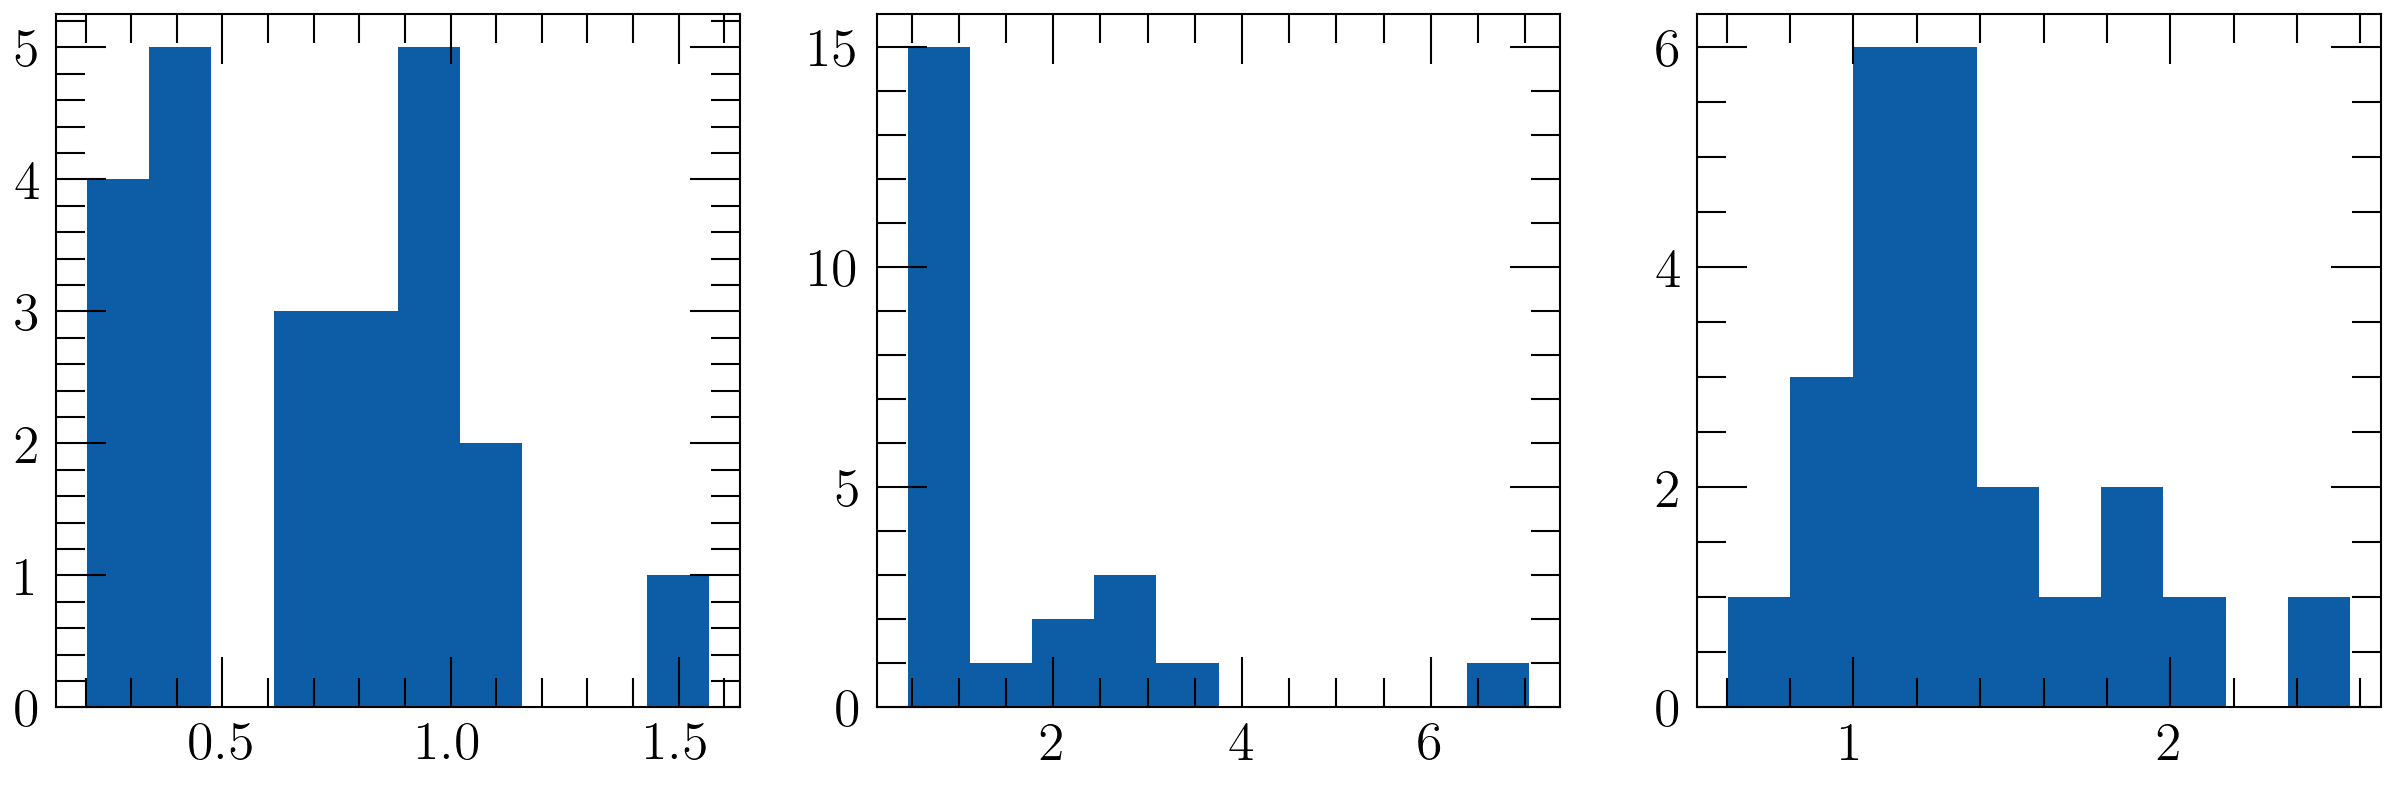

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
ax1.hist(se1/se2)
ax2.hist(se2/se3)
ax3.hist(se3/se1)